[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Jetzt bei: 0 Durchlauf
Jetzt bei: 1 Durchlauf
Jetzt bei: 2 Durchlauf
Jetzt bei: 3 Durchlauf
Jetzt bei: 4 Durchlauf
Jetzt bei: 5 Durchlauf
Jetzt bei: 6 Durchlauf
Jetzt bei: 7 Durchlauf
Jetzt bei: 8 Durchlauf
Jetzt bei: 9 Durchlauf
Jetzt bei: 10 Durchlauf
Jetzt bei: 11 Durchlauf
Jetzt bei: 12 Durchlauf
Jetzt bei: 13 Durchlauf
Jetzt bei: 14 Durchlauf
Jetzt bei: 15 Durchlauf
Jetzt bei: 16 Durchlauf
Jetzt bei: 17 Durchlauf
Jetzt bei: 18 Durchlauf
Jetzt bei: 19 Durchlauf
Jetzt bei: 20 Durchlauf
Jetzt bei: 21 Durchlauf
Jetzt bei: 22 Durchlauf
Jetzt bei: 23 Durchlauf
Jetzt bei: 24 Durchlauf
Jetzt bei: 25 Durchlauf
Jetzt bei: 26 Durchlauf
Jetzt bei: 27 Durchlauf
Jetzt bei: 28 Durchlauf
Jetzt bei: 29 Durchlauf
Jetzt bei: 30 Durchlauf
Jetzt bei: 31 Durchlauf
Jetzt bei: 32 Durchlauf
Jetzt bei: 33 Durchl

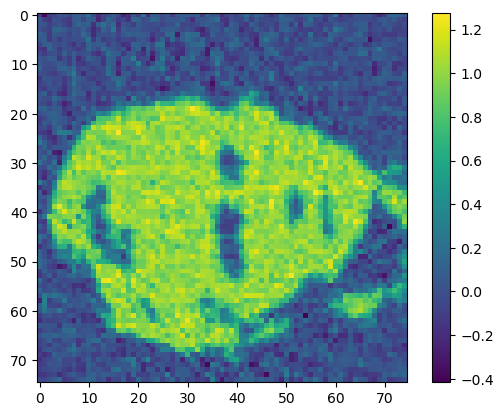

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cgls(A, b, tol):  
    i=0
    u = np.zeros((5625,1)) 
    r = np.subtract(b,A.dot(u)) 
    s = np.matmul(np.transpose(A),r)
    p = s.copy()
    beta = np.transpose(s).dot(s)
    while (np.linalg.norm(r) >= tol):
        Ap = np.matmul(A,p)
        betast = np.transpose(Ap).dot(Ap)
        alpha = beta/betast
        u = u + (alpha* p)
        r = r - (alpha*Ap)
        s = np.matmul(np.transpose(A),r) 
        beta_old = beta
        beta = np.transpose(s).dot(s)
        gamma = np.divide(beta,beta_old)
        p = np.add(s,gamma*p)
        print("Jetzt bei: " + str(i) + " Durchlauf")
        i=i+1
    return u

fileA = open('./CTAC.dat', 'r')
LinesA = fileA.readlines()
fileb = open('./CTbC.dat', 'r')
Linesb = fileb.readlines()

A = np.zeros((1800,5625)) # 1800 Zeilen mit 5625 Spalten
for i in range(1799):
    for j in range(5624):
        A[i][j] = LinesA[j+i*5625]
print(A)

b = np.zeros((1800,1)) #Vektor
for i in range(1799):
    b[i][0] = Linesb[i]
print(b)

res = cgls(A,b,0.000001)
print(res)
with open('res.npy', 'wb') as f:
    np.savetxt(f, res)
pic = np.reshape(res, (75, 75))
with open('apic.npy', 'wb') as f:
    np.savetxt(f, pic)

plt.imshow(pic, interpolation='none')
plt.colorbar()
plt.show()
plt.savefig('image.png')